In [4]:
from model import *
from data import *
from IPython.display import Image

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [6]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 10 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
100/100 [==============================] - 580s 6s/step - loss: 0.2617 - accuracy: 0.8537

Epoch 00001: loss improved from inf to 0.26168, saving model to unet_membrane.hdf5
Epoch 2/5
100/100 [==============================] - 590s 6s/step - loss: 0.1338 - accuracy: 0.9807

Epoch 00002: loss improved from 0.26168 to 0.13381, saving model to unet_membrane.hdf5
Epoch 3/5
100/100 [==============================] - 576s 6s/step - loss: 0.3577 - accuracy: 0.8793

Epoch 00003: loss did not improve from 0.13381
Epoch 4/5
100/100 [==============================] - 579s 6s/step - loss: 0.1415 - accuracy: 0.9746

Epoch 00004: loss did not improve from 0.13381
Epoch 5/5
100/100 [==============================] - 560s 6s/step - loss: 0.1288 - accuracy: 0.9842

Epoch 00005: loss improved from 0.13381 to 0.12884, saving model to unet_membrane.hdf5


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [2]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
saveResult("data/membrane/test",results)

/Users/shunshao/Desktop/comp0031_research/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


10/10 [==============================] - 8s 831ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

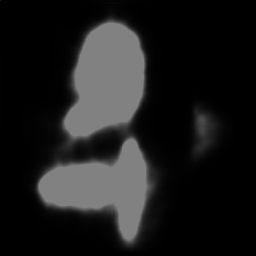

In [6]:
Image(filename='data/membrane/test/0_predict.png') 

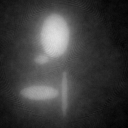

In [7]:
Image(filename='data/membrane/test/0.png') 